In [3]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay
import seaborn as sns
import matplotlib.pyplot as plt
import joblib

In [4]:
# Create folder to save images
os.makedirs("images", exist_ok=True)

In [5]:
# Load dataset
df = pd.read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv')
column_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
df.columns = column_names

In [6]:
# Check for nulls and basic statistics
print("Missing values:\n", df.isnull().sum())
print("\nDataset description:\n", df.describe())

Missing values:
 sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

Dataset description:
        sepal_length  sepal_width  petal_length  petal_width
count    149.000000   149.000000    149.000000   149.000000
mean       5.848322     3.051007      3.774497     1.205369
std        0.828594     0.433499      1.759651     0.761292
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.400000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


In [7]:
# Features and labels
X = df.drop('species', axis=1)
y = df['species']

In [8]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Visualize

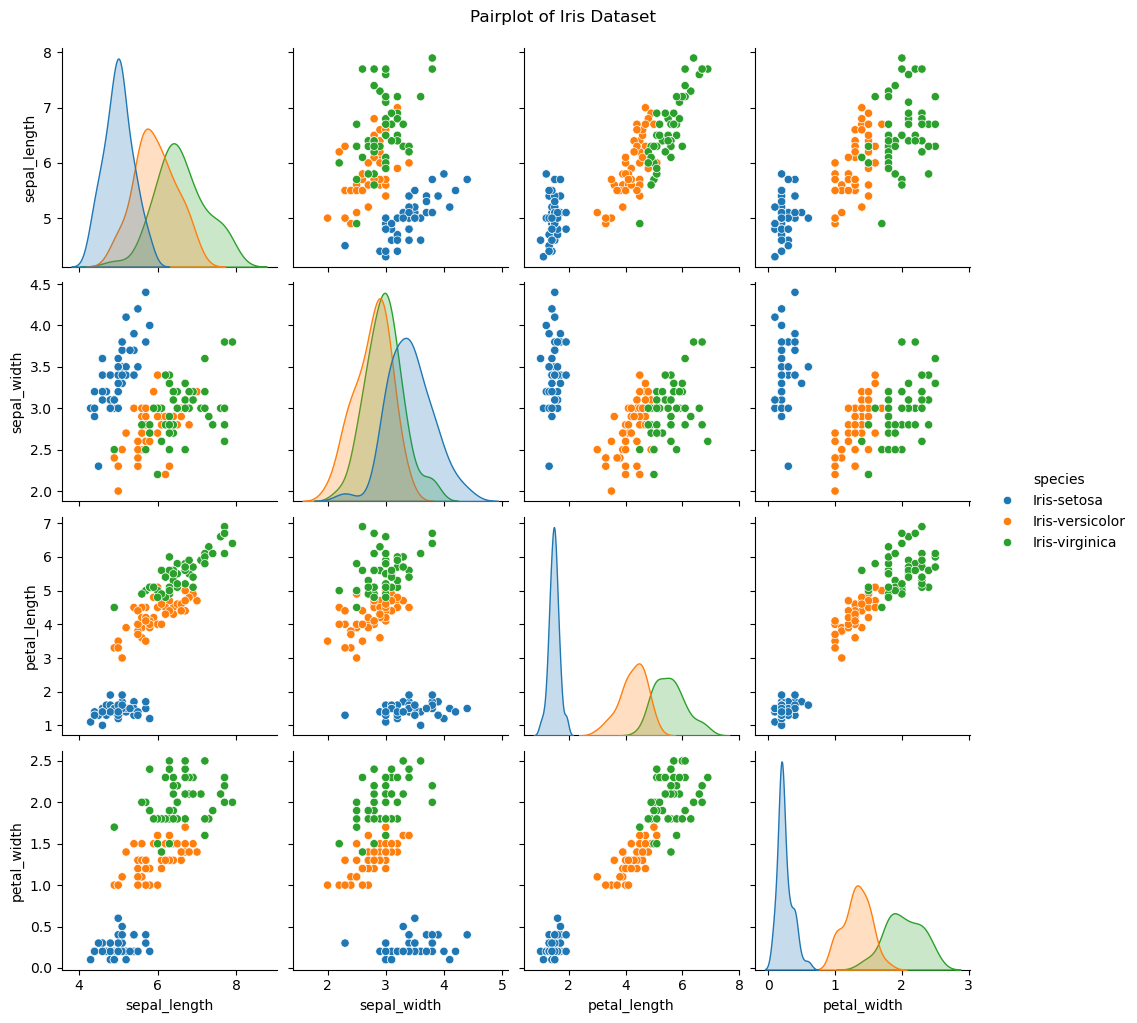

In [9]:

pairplot = sns.pairplot(df, hue='species')
pairplot.fig.suptitle("Pairplot of Iris Dataset", y=1.02)
pairplot.savefig("images/pairplot.png")
plt.show()

# --------- MODEL 1: Decision Tree ---------

In [10]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)

# Evaluation
dt_acc = accuracy_score(y_test, dt_pred)
print("Decision Tree Accuracy:", dt_acc)
print("Decision Tree Classification Report:\n", classification_report(y_test, dt_pred))

Decision Tree Accuracy: 0.9
Decision Tree Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      0.67      0.80         9
 Iris-virginica       0.79      1.00      0.88        11

       accuracy                           0.90        30
      macro avg       0.93      0.89      0.89        30
   weighted avg       0.92      0.90      0.90        30



# --------- MODEL 2: Perceptron ---------

In [11]:

perc_model = Perceptron(max_iter=1000, tol=1e-3, random_state=42)
perc_model.fit(X_train, y_train)
perc_pred = perc_model.predict(X_test)

# Evaluation
perc_acc = accuracy_score(y_test, perc_pred)
print("Perceptron Accuracy:", perc_acc)
print("Perceptron Classification Report:\n", classification_report(y_test, perc_pred))

Perceptron Accuracy: 0.8
Perceptron Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       0.77      1.00      0.87        10
Iris-versicolor       1.00      0.33      0.50         9
 Iris-virginica       0.79      1.00      0.88        11

       accuracy                           0.80        30
      macro avg       0.85      0.78      0.75        30
   weighted avg       0.84      0.80      0.76        30



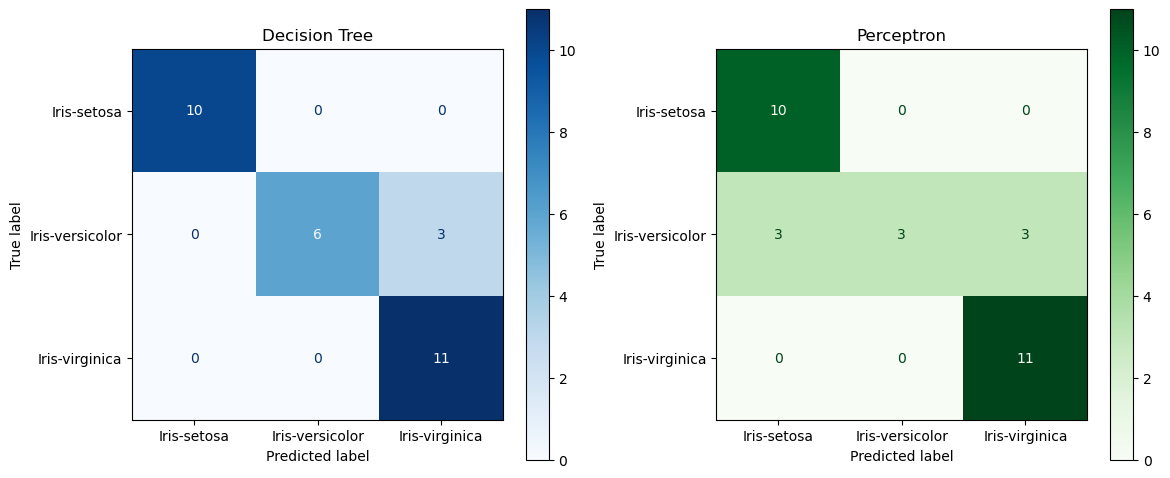

In [12]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
ConfusionMatrixDisplay.from_predictions(y_test, dt_pred, ax=axes[0], cmap='Blues')
axes[0].set_title("Decision Tree")

ConfusionMatrixDisplay.from_predictions(y_test, perc_pred, ax=axes[1], cmap='Greens')
axes[1].set_title("Perceptron")

plt.tight_layout()
plt.savefig("images/confusion_matrices.png")
plt.show()

### ------- Accuracy Comparison Plot ---------

C:\Users\IVS Intern\AppData\Local\Temp\ipykernel_2904\1051843243.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=accuracies, palette='viridis')


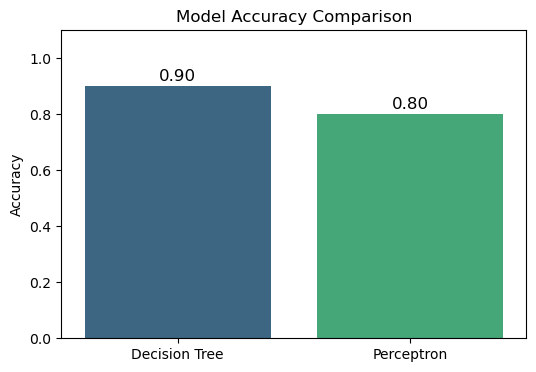

In [13]:
models = ['Decision Tree', 'Perceptron']
accuracies = [dt_acc, perc_acc]

plt.figure(figsize=(6, 4))
sns.barplot(x=models, y=accuracies, palette='viridis')
plt.ylim(0, 1.1)
plt.ylabel("Accuracy")
plt.title("Model Accuracy Comparison")
for i, acc in enumerate(accuracies):
    plt.text(i, acc + 0.02, f"{acc:.2f}", ha='center', fontsize=12)

plt.savefig("images/accuracy_comparison.png")
plt.show()


In [14]:


# Save both models
joblib.dump(dt_model, 'decision_tree_model.pkl')
joblib.dump(perc_model, 'perceptron_model.pkl')
print("Models saved successfully.")

Models saved successfully.
